In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('seaborn')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import zscore

In [2]:
df=pd.read_csv(r'C:\Users\OM RAJ PANDEY\Desktop\jupyter\Data-Science-ML-Capstone-Projects-0a4a1b7c052ef7e81e77604796cc3429b1763db7\Data-Science-ML-Capstone-Projects-0a4a1b7c052ef7e81e77604796cc3429b1763db7\baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.shape

(30, 17)

In [4]:
#checking for null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


No need to change the datatype they are appropriate so we can skip the step of data conversion.

# Visualization

<AxesSubplot:xlabel='R', ylabel='W'>

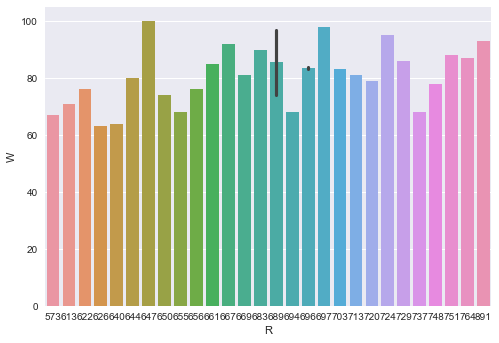

In [7]:
sns.barplot(x="R",y="W",data=df)

<AxesSubplot:xlabel='AB', ylabel='W'>

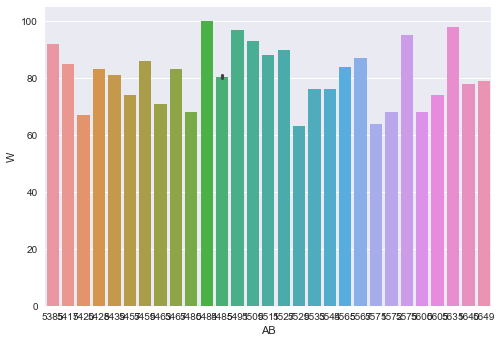

In [11]:
sns.barplot(x="AB",y="W",data=df)

<AxesSubplot:xlabel='H', ylabel='W'>

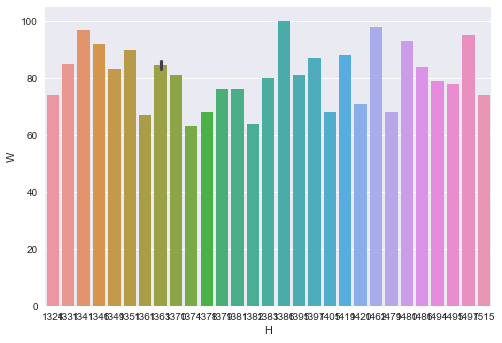

In [13]:
sns.barplot(x="H",y="W",data=df)

<AxesSubplot:xlabel='2B', ylabel='W'>

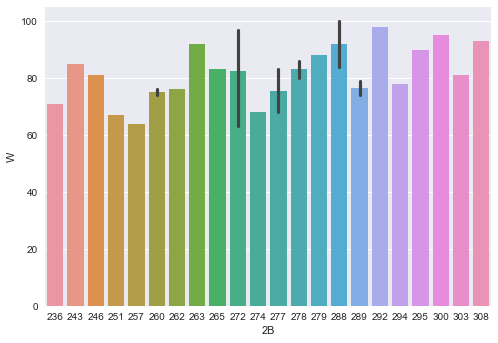

In [14]:
sns.barplot(x="2B",y="W",data=df)

<AxesSubplot:xlabel='3B', ylabel='W'>

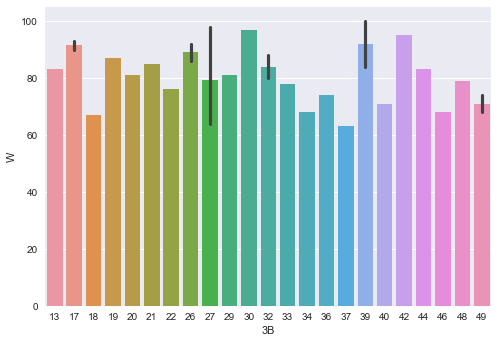

In [15]:
sns.barplot(x="3B",y="W",data=df)

<AxesSubplot:xlabel='HR', ylabel='W'>

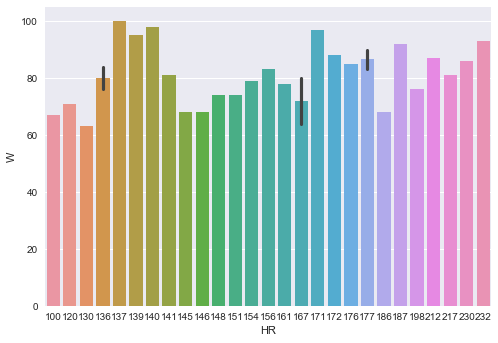

In [16]:
sns.barplot(x="HR",y="W",data=df)

<AxesSubplot:xlabel='BB', ylabel='W'>

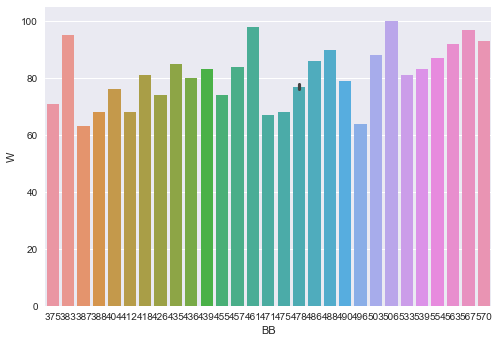

In [17]:
sns.barplot(x="BB",y="W",data=df)

<AxesSubplot:xlabel='SO', ylabel='W'>

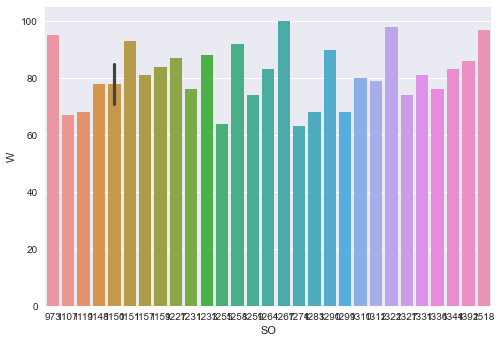

In [18]:
sns.barplot(x="SO",y="W",data=df)

<AxesSubplot:xlabel='SB', ylabel='W'>

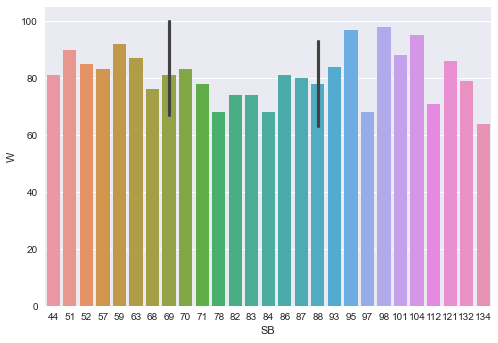

In [19]:
sns.barplot(x="SB",y="W",data=df)

<AxesSubplot:xlabel='RA', ylabel='W'>

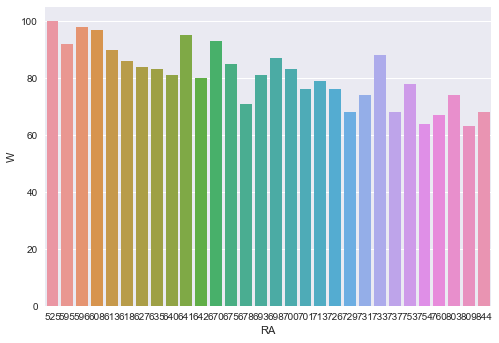

In [20]:
sns.barplot(x="RA",y="W",data=df)

<AxesSubplot:xlabel='ER', ylabel='W'>

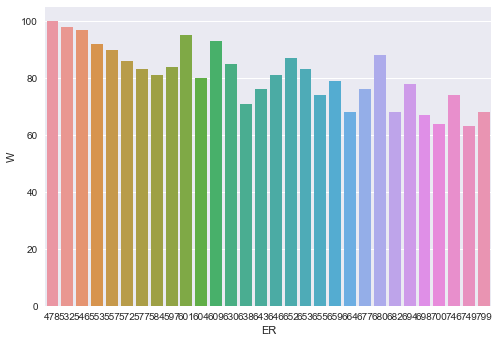

In [21]:
sns.barplot(x="ER",y="W",data=df)

<AxesSubplot:xlabel='ERA', ylabel='W'>

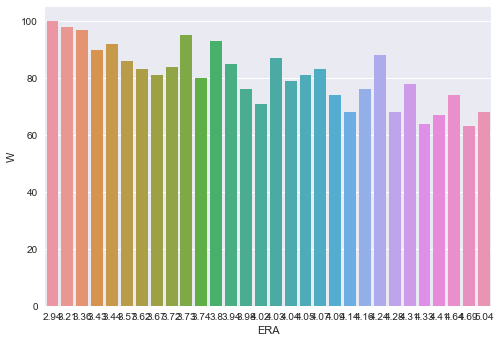

In [31]:
sns.barplot(x="ERA",y="W",data=df)

<AxesSubplot:xlabel='CG', ylabel='W'>

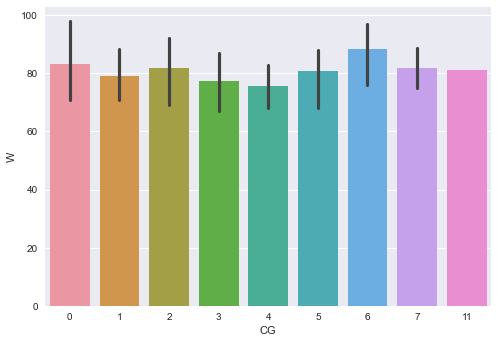

In [23]:
sns.barplot(x="CG",y="W",data=df)

<AxesSubplot:xlabel='SHO', ylabel='W'>

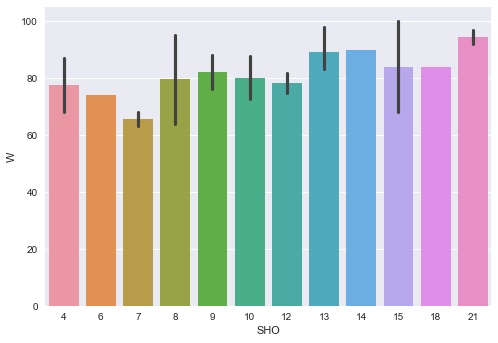

In [24]:
sns.barplot(x="SHO",y="W",data=df)

<AxesSubplot:xlabel='SV', ylabel='W'>

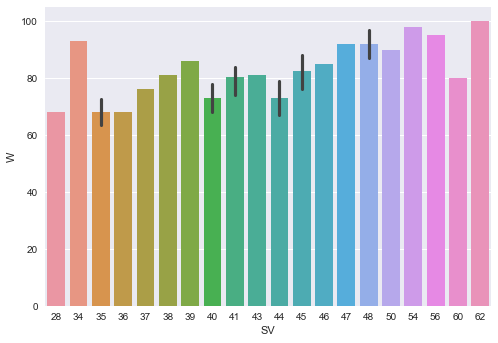

In [25]:
sns.barplot(x="SV",y="W",data=df)

<AxesSubplot:xlabel='E', ylabel='W'>

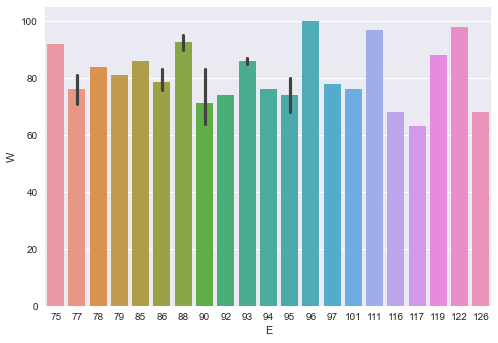

In [28]:
sns.barplot(x="E",y="W",data=df)

Runs allowed is highly correlated to win.Earned Runs is highly correlated to win.Earned Run Average is not correlated to win.Shutouts are highly correlated to win.Saves are lightly correlated to win.Errors are not correlated to win.

In [32]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>],
       [<AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>],
       [<AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>],
       [<AxesSubplot:title={'center':'E'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

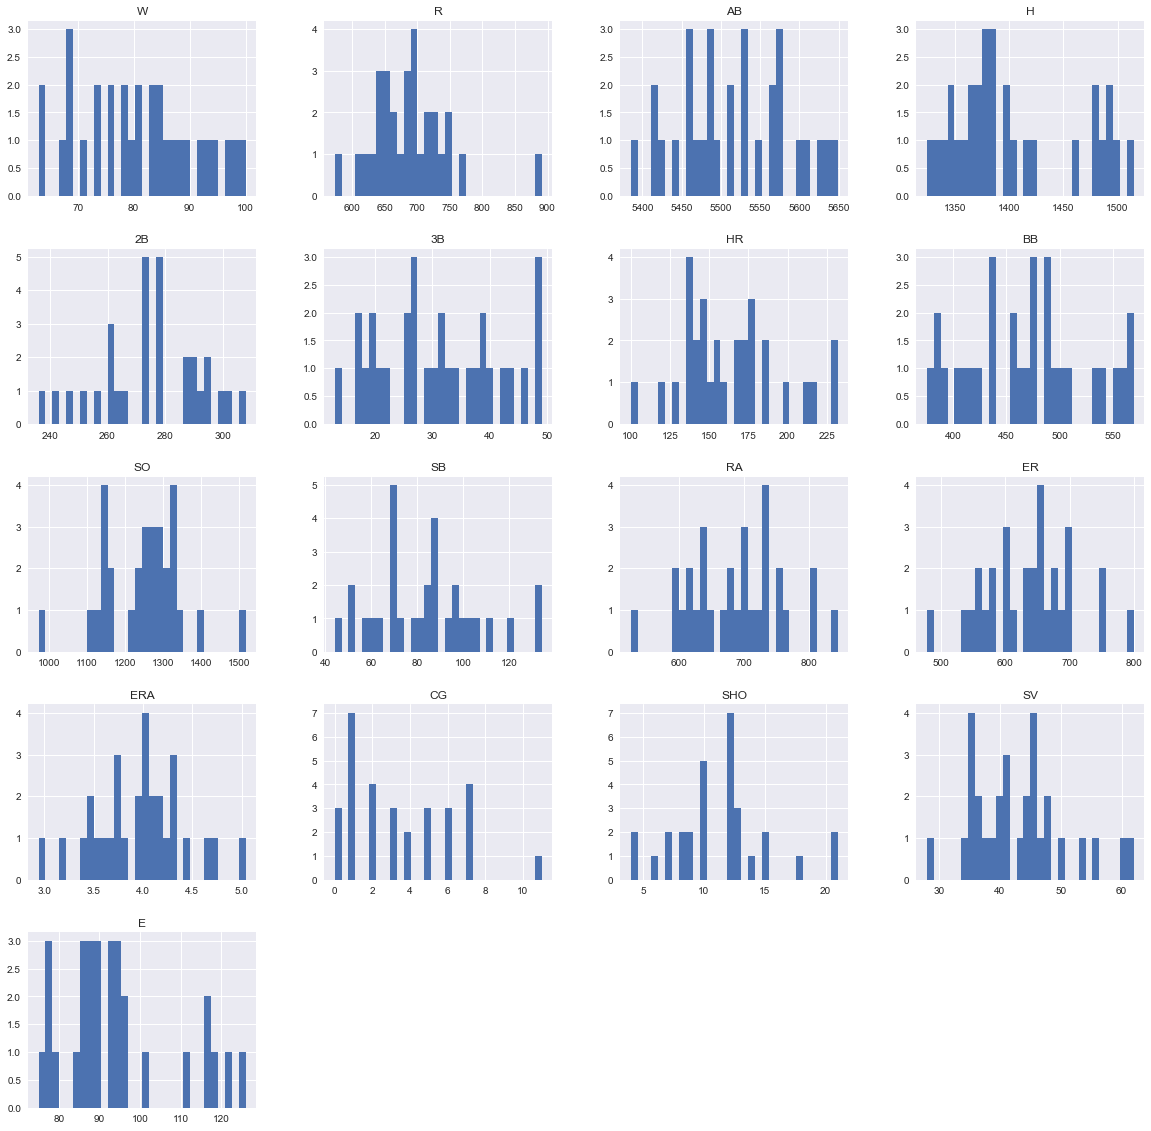

In [34]:
#Plotting histogram
df.hist(figsize=(20,20),grid=True,bins=30)

Doubles data is left-skewed,Triple data is right-skewed,The home run data is right-skewed,Strikeout data is left-skewed,ERA data is right-skewed,Shutouts data is right-skewed,Errors data is right-skewed.

In [35]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [36]:
#making the skew less than or equal to 0.55 for better prediction and plotting normal distribution
skew=('R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

# OUTLIERS

W          AxesSubplot(0.125,0.71587;0.133621x0.16413)
R       AxesSubplot(0.285345,0.71587;0.133621x0.16413)
AB       AxesSubplot(0.44569,0.71587;0.133621x0.16413)
H       AxesSubplot(0.606034,0.71587;0.133621x0.16413)
2B      AxesSubplot(0.766379,0.71587;0.133621x0.16413)
3B        AxesSubplot(0.125,0.518913;0.133621x0.16413)
HR     AxesSubplot(0.285345,0.518913;0.133621x0.16413)
BB      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
SO     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
SB     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
RA        AxesSubplot(0.125,0.321957;0.133621x0.16413)
ER     AxesSubplot(0.285345,0.321957;0.133621x0.16413)
ERA     AxesSubplot(0.44569,0.321957;0.133621x0.16413)
CG     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
SHO    AxesSubplot(0.766379,0.321957;0.133621x0.16413)
SV           AxesSubplot(0.125,0.125;0.133621x0.16413)
E         AxesSubplot(0.285345,0.125;0.133621x0.16413)
dtype: object

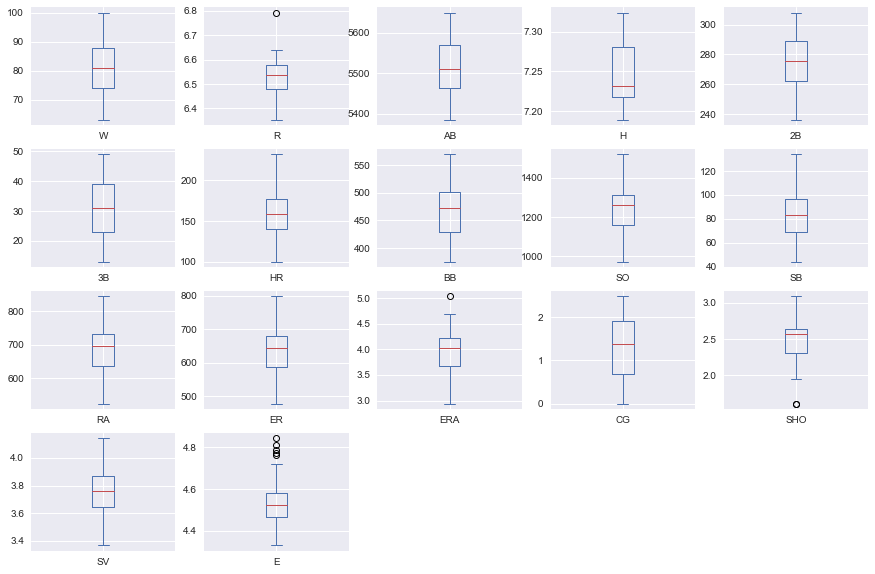

In [37]:
#Plotting boxplot of each column to check the outliers
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

In [40]:
z=np.abs(zscore(df[['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']]))
print(z)

           W         R        AB         H        2B        3B        HR  \
0   1.365409  0.665329  0.847731  1.649382  1.420173  1.041193  0.787299   
1   0.197838  0.179562  0.711094  0.981656  0.127403  1.235809  0.243967   
2   0.003243  0.307704  1.115233  0.134210  1.588795  0.223808  0.723377   
3   0.483244  1.204730  0.241522  0.389136  0.828122  0.418423  0.883181   
4   0.677839  0.055070  1.280738  1.951480  0.801892  1.722347  0.403770   
5   1.170814  3.221983  0.104884  1.360715  1.869832  1.391501  2.185047   
6   0.587028  1.327687  0.732263  0.098001  0.153633  1.196885  1.545833   
7   0.003243  0.476767  0.451289  0.591253  1.615025  1.099578  1.705636   
8   0.094054  0.776713  0.451289  0.352560  0.183611  0.068115  0.107601   
9   0.288649  1.066997  1.785913  1.615591  1.082929  0.165423  0.084163   
10  0.684326  1.116298  0.076017  0.296915  0.239818  0.068115  0.267405   
11  0.489731  0.750096  0.826562  0.720719  0.183611  0.515731  2.121125   
12  0.392433

In [41]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13,
       13, 13, 13, 13, 1

In [42]:
#assigning the values to df_new which are less then threshold value and removing the outliers
df_new=df[(z<3).all(axis=1)]

In [43]:
print(df.shape)
print(df_new.shape)
df=df_new
print('Shape after removing the outlier',df.shape)

(30, 17)
(29, 17)
Shape after removing the outlier (29, 17)


# Correlation Matrix:

[]

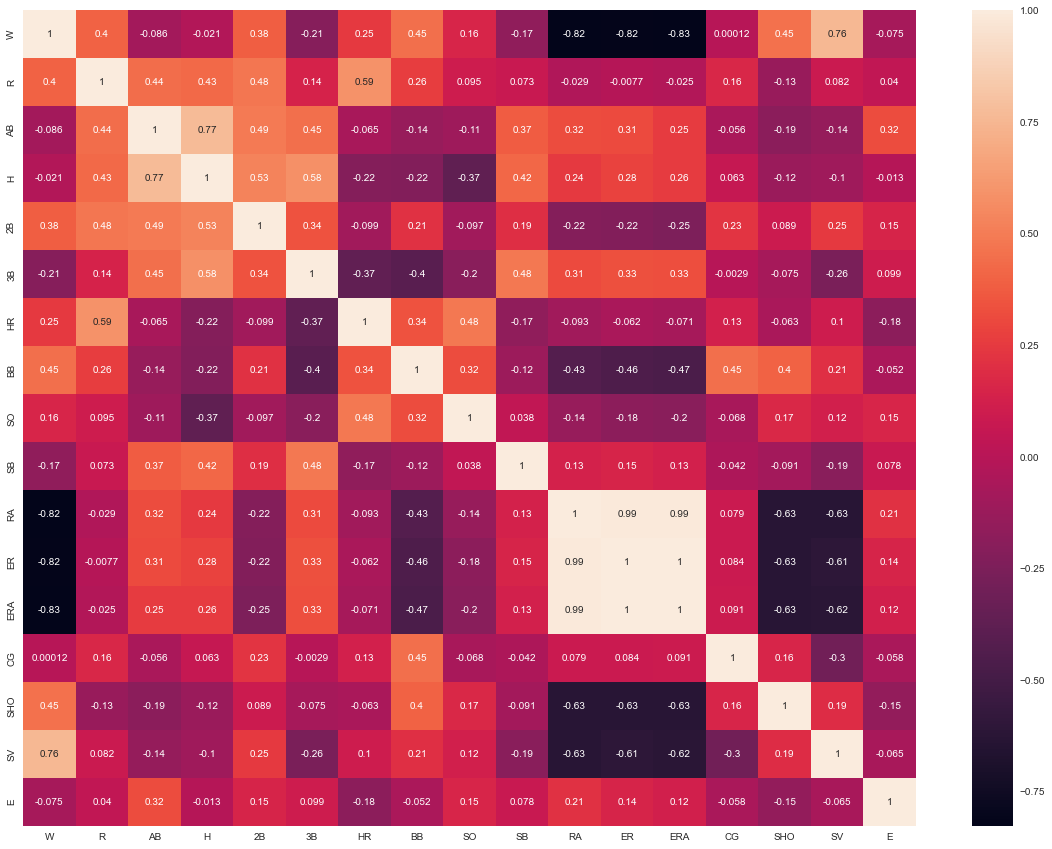

In [44]:
df_cor=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(df_cor,annot=True)
plt.plot()

# Prediction with Number of predicted wins(W)

In [45]:
#store feature matrix in x and response(target) in y
x=df.drop(['W'],axis=1)
y=df['W']

In [46]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [47]:
print(x)

[[ 0.95271901  0.83008422  1.72372599  1.55653766  1.01084549 -0.76586314
  -1.53635899 -2.72762331  0.9059529  -0.66451353 -0.51114812 -0.51138828
  -0.24041455 -0.72241314  1.55481209 -0.43573324]
 [ 0.35665907 -0.70283074 -0.94984589  0.20117132  1.20891656 -0.18138864
  -0.49502051  0.12189552 -0.58531515  0.15463823  0.23216082  0.23895226
  -0.24041455  0.31208451  0.29622875 -0.59810993]
 [-0.24123892 -1.10025314 -0.08870013  1.73332457 -0.2766165  -0.69710144
   1.25294051 -0.9258657   0.11645805 -0.67839746 -0.75415297 -0.64380131
   1.81571095 -0.15787854 -0.67278738 -1.19738162]
 [-1.34193161  0.23395062 -0.34774692 -0.8006212  -0.47468758 -0.8690057
  -1.14585706 -0.20124579 -0.6730368   0.16852216  0.08921679  0.04033271
   1.21433279 -0.42600884 -0.82526317  0.53829069]
 [ 0.20390224  1.25589393  2.03070817  0.90831897  1.70409425 -0.35329291
  -0.19749523  0.07293472 -0.01512442  1.58468284  1.56154027  1.4968761
   1.21433279  0.31208451 -1.14263711 -0.59810993]
 [ 1.76

In [48]:
print(y)

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64


In [49]:
#Train/Test split
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
#Model training
lr=LinearRegression()
lr.fit(x_train,y_train)
svm=SVR()
svm.fit(x_train,y_train)
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
gr=GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [52]:
#Prediction on Test Data
y_pred1=lr.predict(x_test)
y_pred2=svm.predict(x_test)
y_pred3=rf.predict(x_test)
y_pred4=gr.predict(x_test)

In [53]:
df1=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [54]:
df1

,Actual,lr,svm,rf,gr
28,74,76.946590,79.204605,76.68,73.202034
17,97,82.858917,81.731175,89.74,89.334652
13,76,79.018837,80.605077,77.75,79.203962
23,67,59.042820,79.771717,76.34,79.364067
9,78,79.072386,79.565964,73.65,71.361255
10,88,79.360984,79.837765,76.52,78.971244


In [55]:
#compare performance visually
import matplotlib.pyplot as plt

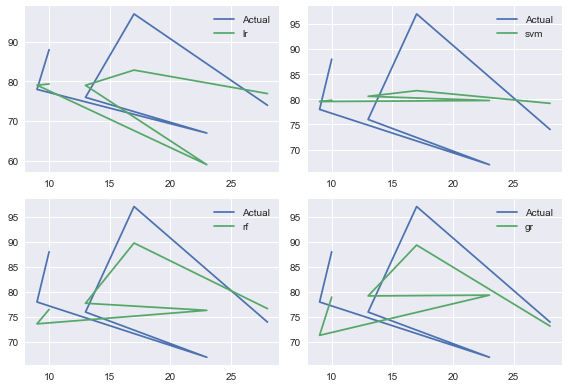

In [56]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label="lr")
plt.legend()
plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svm")
plt.legend()
plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()
plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.tight_layout()
plt.legend()

In [57]:
#Evaluating the Algorithm
from sklearn import metrics

In [58]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

In [59]:
print(score1,score2,score3,score4)

0.3825859475807053 0.11137935800186238 0.47941003460207576 0.3977141434084752


On behalf of r2 Score Random Forest Regressor is our best model

In [60]:
s1=metrics.mean_absolute_error(y_test,y_pred1)
s2=metrics.mean_absolute_error(y_test,y_pred2)
s3=metrics.mean_absolute_error(y_test,y_pred3)
s4=metrics.mean_absolute_error(y_test,y_pred4)

In [61]:
print(s1,s2,s3,s4)

6.295848811682537 7.929737063594334 6.143333333333335 6.616474123916471


In [62]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,2.197225,4.043051,4.488636
1,83,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,2.564949,3.828641,4.465908
2,81,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,2.397895,3.663562,4.382027
3,76,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,2.302585,3.637586,4.624973
4,74,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,2.564949,3.583519,4.465908


In [63]:
#Predict win for new data
data={'R':6.586,'AB':5575,'H':7.311,'2B':277,'3B':29,'HR':156,'BB':439,'SO':1264,'SB':70,'RA':641,'ER':653,'ERA':3.98,'CG':
     1.098,'SHO':2.397,'SV':3.663,'E':4.624}
df=pd.DataFrame(data,index=[0])
df

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,6.586,5575,7.311,277,29,156,439,1264,70,641,653,3.98,1.098,2.397,3.663,4.624


In [64]:
new_pred=rf.predict(df)
print(new_pred)

[79.6]


C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [65]:
#Save Model Using Joblib
rf=RandomForestRegressor()
rf.fit(x,y)

RandomForestRegressor()

In [66]:
import joblib

In [67]:
joblib.dump(rf,'model_joblib_rf')

['model_joblib_rf']

In [68]:
model=joblib.load('model_joblib_rf')

In [70]:
model.predict(df)

C:\Users\OM RAJ PANDEY\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([82.47])